In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
pd.options.display.max_columns = 30

In [5]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1198,1199,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,356,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,178000
137,138,90,RL,82.0,11070,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Family,171000
796,797,20,RL,71.0,8197,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,138,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2007,WD,Normal,143500
1047,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,145000
368,369,20,RL,78.0,7800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,0,98,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,132000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
def check_nulls(df):
    for col in df.columns:
        n_nan = df[col].isnull().sum()
        if n_nan > 0:
            print(col, n_nan)
check_nulls(df)

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [8]:
df = df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)

In [9]:
check_nulls(df)

LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [10]:
df.LotFrontage = df.LotFrontage.fillna(60.0)
df = df.dropna()

In [11]:
check_nulls(df)
df.shape

(1338, 76)

In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [13]:
quantitative = [f for f in df.columns if df.dtypes[f].kind in 'iuf']
qualitative = list(set(df.columns) - set(quantitative))
# quantitative.remove('SalePrice')
quantitative.remove('Id')
# qualitative = [f for f in df.columns if train.dtypes[f] == 'object']

Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities

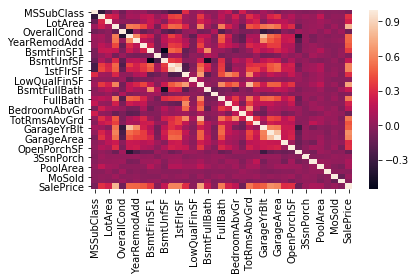

In [14]:
plt.figure(1)
corr = df[quantitative].corr()
sns.heatmap(corr)
plt.tight_layout()
plt.savefig('heatmap.tif')

In [15]:
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.352244,-0.134158,0.051690,-0.098153,0.056456,0.038513,0.031333,-0.069053,-0.079329,-0.141025,-0.263613,-0.258787,0.306709,0.019990,...,0.014514,-0.024752,0.082040,0.006872,-0.070278,-0.010175,-0.000359,-0.022598,-0.041391,-0.022748,0.010199,-0.021512,-0.016283,-0.021591,-0.079599
LotFrontage,-0.352244,1.000000,0.274647,0.229417,-0.048874,0.093067,0.080759,0.172178,0.204002,0.030598,0.121258,0.374863,0.401234,0.065911,0.014279,...,0.320108,0.203845,0.062084,0.268524,0.331453,0.054057,0.136774,0.019505,0.059533,0.031694,0.182728,-0.014666,0.013787,0.006166,0.323492
LotArea,-0.134158,0.274647,1.000000,0.090451,0.001415,-0.005022,0.001681,0.096727,0.210148,0.110493,-0.014589,0.267188,0.288502,0.047773,0.009729,...,0.185654,0.263061,-0.025700,0.138228,0.168630,0.167822,0.084942,-0.017968,0.019326,0.038489,0.077050,0.040824,0.000118,-0.012066,0.254757
OverallQual,0.051690,0.229417,0.090451,1.000000,-0.163080,0.570668,0.549460,0.401175,0.197441,-0.086014,0.292940,0.505897,0.481978,0.281145,-0.016704,...,0.442941,0.377359,0.545835,0.591878,0.530092,0.218570,0.307615,-0.116931,0.026470,0.045257,0.064570,-0.029351,0.062641,-0.013949,0.783546
OverallCond,-0.098153,-0.048874,0.001415,-0.163080,1.000000,-0.417330,0.035076,-0.141080,-0.060068,0.035698,-0.161038,-0.228020,-0.144066,0.011685,0.041865,...,-0.063883,-0.031910,-0.336541,-0.249832,-0.204905,-0.012947,-0.060429,0.071473,0.023789,0.053759,-0.003544,0.077314,-0.011772,0.056340,-0.108627
YearBuilt,0.056456,0.093067,-0.005022,0.570668,-0.417330,1.000000,0.617156,0.299410,0.224264,-0.070403,0.147762,0.385146,0.263585,0.006989,-0.160289,...,0.099415,0.110807,0.825172,0.524076,0.443854,0.212296,0.216793,-0.385415,0.028982,-0.070809,0.001006,-0.033493,0.004396,-0.007898,0.504297
YearRemodAdd,0.038513,0.080759,0.001681,0.549460,0.035076,0.617156,1.000000,0.168311,0.099681,-0.085268,0.171881,0.264281,0.241889,0.120545,-0.064395,...,0.174660,0.089952,0.641585,0.459449,0.386213,0.201057,0.231129,-0.218452,0.039422,-0.052513,0.003354,-0.001379,0.014552,0.034503,0.501435
MasVnrArea,0.031333,0.172178,0.096727,0.401175,-0.141080,0.299410,0.168311,1.000000,0.253015,-0.083303,0.104662,0.365629,0.341001,0.169730,-0.061707,...,0.289758,0.229365,0.249750,0.363916,0.367237,0.149182,0.129015,-0.112225,0.015221,0.052474,0.009334,-0.028975,-0.013461,-0.001521,0.465811
BsmtFinSF1,-0.069053,0.204002,0.210148,0.197441,-0.060068,0.224264,0.099681,0.253015,1.000000,-0.064855,-0.552809,0.505000,0.450366,-0.151876,-0.051909,...,0.046284,0.245323,0.144611,0.197559,0.284095,0.187178,0.107561,-0.105669,0.026811,0.051906,0.142708,0.007869,-0.021242,0.023958,0.359677
BsmtFinSF2,-0.079329,0.030598,0.110493,-0.086014,0.035698,-0.070403,-0.085268,-0.083303,-0.064855,1.000000,-0.233449,0.083184,0.094065,-0.109254,0.007072,...,-0.042207,0.035643,-0.092595,-0.080264,-0.053411,0.061206,0.004211,0.045668,-0.031475,0.085865,0.041148,0.006246,-0.022039,0.032855,-0.031226


In [16]:
df['LengthBuilt'] = 2019 - df.YearBuilt
df['LengthRemod'] = 2019 - df.YearRemodAdd
df.drop(['YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)

In [17]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'

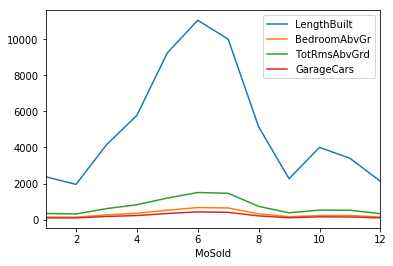

In [18]:
df.groupby('MoSold')['LengthBuilt','BedroomAbvGr','TotRmsAbvGrd','GarageCars'].sum().plot()

In [19]:
df['aaa'] = df.BsmtFinSF1 + df.BsmtFinSF2 + df.BsmtUnfSF
df[['aaa','TotalBsmtSF']].head(10)
df = df.drop(['aaa','TotalBsmtSF'], axis=1)

In [20]:
df['aaa'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea'] 
df[['aaa','1stFlrSF','2ndFlrSF','GrLivArea']].head(10)
df = df.drop(['aaa','1stFlrSF','2ndFlrSF'], axis=1)

In [21]:
df['Bathroom'] = df.BsmtFullBath + df.FullBath + df.HalfBath*0.5
df[['Bathroom','BsmtFullBath','FullBath','HalfBath']].head(10)

,Bathroom,BsmtFullBath,FullBath,HalfBath
0,3.5,1,2,1
1,2.0,0,2,0
2,3.5,1,2,1
3,2.0,1,1,0
4,3.5,1,2,1
5,2.5,1,1,1
6,3.0,1,2,0
7,3.5,1,2,1
8,2.0,0,2,0
9,2.0,1,1,0


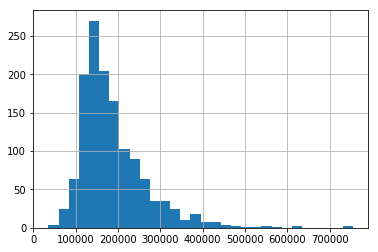

In [22]:
# remove outliers
plt.figure(10)
df.SalePrice.hist(bins = 30)
df = df[df.SalePrice < 600000]
plt.savefig('saleprice_hist.tif')

In [23]:
df.shape

(1334, 74)

try to fit models

In [24]:
from sklearn.linear_model import LinearRegression, HuberRegressor

In [25]:
y = df.SalePrice.values
df = df.drop(['Id', 'SalePrice'], axis=1)
quantitative = [f for f in df.columns if df.dtypes[f].kind in 'iuf']
qualitative = list(set(df.columns) - set(quantitative))

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[quantitative] = df[quantitative].astype('float64')
df[quantitative] = scaler.fit_transform(df[quantitative])

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in qualitative:
    df[col] = le.fit_transform(df[col])

In [28]:
X = df.values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
y_pred = lm.predict(X_test)

In [32]:
res = np.hstack([y_pred.reshape(-1,1), y_test.reshape(-1,1)])
res[:10,:]

array([[140450.00199157, 134500.        ],
       [139426.00199157, 147000.        ],
       [114546.00199157, 120000.        ],
       [209698.00199157, 201000.        ],
       [158626.00199157, 219500.        ],
       [146930.00199157, 128500.        ],
       [133922.00199157, 135000.        ],
       [245202.00199157, 235128.        ],
       [188370.00199157, 185000.        ],
       [227394.00199157, 239000.        ]])

In [33]:
linear_r2 = r2_score(y_test, y_pred)
print("Linear model R2: {}".format(linear_r2))

Linear model R2: 0.8670521961232751


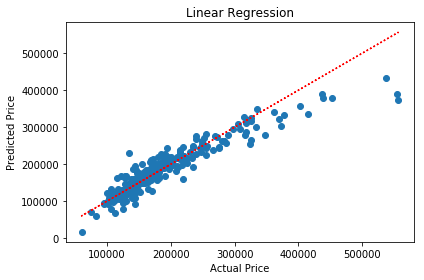

In [34]:
plt.figure(2)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, ':r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression')
plt.tight_layout()
plt.savefig('lr.tif')

In [35]:
import statsmodels.api as sm
X_train_ols = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_ols)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     75.97
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        23:37:02   Log-Likelihood:                -12464.
No. Observations:                1067   AIC:                         2.507e+04
Df Residuals:                     995   BIC:                         2.543e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.368e+05    2.6e+04      5.259      0.000    8.58e+04    1.88e+05
x1         -5036.2344   2090.384     -2.409      0.016   -9138.302    -934.167
x2         -2601.3182   1660.555     -1.567      0.118   -5859.910     657.274
x3         -3453.4967   1147.102     -3.011      0.003   -5704.514   -1202.479
x4          3753.3644   1112.106      3.375      0.001    1571.022    5935.707
x5          4.364e+04    1.5e+04      2.907      0.004    1.42e+04    7.31e+04
x6          -838.7058    730.053     -1.149      0.251   -2271.326     593.914
x7          3787.4249   1490.771      2.541      0.011     862.009    6712.840
x8          -5.02e+04   3.15e+04     -1.592      0.112   -1.12e+05    1.17e+04
x9           212.1365    598.050      0.355      0.723    -961.448    1385.721
x10         1.227e+04   4242.669      2.892      0.004    3942.149    2.06e+04
x11          402.0279    172.874      2.326      0.020      62.788     741.268
x12          125.9444   1111.012      0.113      0.910   -2054.252    2306.141
x13        -1.127e+04   3942.047     -2.859      0.004    -1.9e+04   -3532.672
x14        -1576.2760   1648.974     -0.956      0.339   -4812.142    1659.590
x15        -1538.7713    713.007     -2.158      0.031   -2937.941    -139.601
x16         1.593e+04   1759.616      9.051      0.000    1.25e+04    1.94e+04
x17         5422.3561   1237.611      4.381      0.000    2993.729    7850.983
x18         2732.2546   1238.626      2.206      0.028     301.635    5162.874
x19         2464.3323   1667.053      1.478      0.140    -807.011    5735.675
x20        -1347.6934    620.792     -2.171      0.030   -2565.905    -129.482
x21         1022.1933    548.587      1.863      0.063     -54.326    2098.713
x22         2842.2966   1696.316      1.676      0.094    -486.472    6171.065
x23         4024.5400   1239.529      3.247      0.001    1592.150    6456.930
x24        -5489.9118   2287.680     -2.400      0.017   -9979.143   -1000.681
x25         2557.8794   2701.583      0.947      0.344   -2743.575    7859.334
x26         3628.9640   2163.444      1.677      0.094    -616.472    7874.400
x27        -7033.5994   1564.827     -4.495      0.000   -1.01e+04   -3962.860
x28         2345.4071   1497.341      1.566      0.118    -592.901    5283.715
x29        -3287.8095    941.093     -3.494      0.000   -5134.563   -1441.056
x30         -909.9547    686.384     -1.326      0.185   -2256.880     436.971
x31         -537.3271   2193.360     -0.245      0.807   -4841.470    3766.816
x32         2160.7334   1435.764      1.505      0.133    -656.740    4978.207
x33         1558.8058   1489.195      1.047      0.295   -1363.517    4481.128
x34        -1922.1357   2001.055     -0.961      0.337   -5848.909    2004.638
x35        -2816.3013   5959.610     -0.473      0.637   -1.45e+04    8878.546
x3

In [36]:
p_values = results.pvalues
selected = np.array(['constant'] + df.columns.tolist())

In [37]:
threshold = 0.005
while np.max(p_values) > threshold: 
    # recursively remove the features with the largest p-value, until all of them are
    # below 0.005
    index = np.argmax(p_values)
    print("Removing column {} with p-value {}".format(selected[index], p_values[index]))
    selected = np.delete(selected, index)
    X_train_ols = np.delete(X_train_ols, index, 1)
    model = sm.OLS(y_train, X_train_ols)
    results = model.fit()
    p_values = results.pvalues
results.summary() 

Removing column OpenPorchSF with p-value 0.9879029146970213
Removing column MoSold with p-value 0.955761024954576
Removing column Electrical with p-value 0.9504425791910389
Removing column MiscVal with p-value 0.9229810707816949
Removing column Condition1 with p-value 0.9096223496203303
Removing column BsmtHalfBath with p-value 0.8887114503022204
Removing column GarageFinish with p-value 0.8462983504828039
Removing column LowQualFinSF with p-value 0.8122070449818414
Removing column BsmtFinSF1 with p-value 0.7775299751999571
Removing column LotConfig with p-value 0.7284201651381907
Removing column SaleType with p-value 0.6832009150928018
Removing column GarageType with p-value 0.6482895064970062
Removing column FullBath with p-value 0.6106823373212245
Removing column Bathroom with p-value 0.8184926360757259
Removing column Heating with p-value 0.6050379283298527
Removing column GarageCond with p-value 0.5678862848225914
Removing column GarageQual with p-value 0.5564927485412365
Removing

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.5
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        23:37:03   Log-Likelihood:                -12520.
No. Observations:                1067   AIC:                         2.508e+04
Df Residuals:                    1045   BIC:                         2.519e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.557e+05   1.74e+04      8.965      0.000    1.22e+05     1.9e+05
x1         -8330.5663    953.028     -8.741      0.000   -1.02e+04   -6460.499
x2          3487.1286   1071.709      3.254      0.001    1384.182    5590.075
x3          4.792e+04   1.48e+04      3.246      0.001     1.9e+04    7.69e+04
x4          1.124e+04   3907.877      2.875      0.004    3567.978    1.89e+04
x5           481.7496    162.343      2.967      0.003     163.195     800.304
x6          1.779e+04   1706.755     10.426      0.000    1.44e+04    2.11e+04
x7          6052.8318   1044.031      5.798      0.000    4004.195    8101.468
x8         -7656.4842   2218.710     -3.451      0.001    -1.2e+04   -3302.850
x9         -7097.9803   1504.577     -4.718      0.000   -1.01e+04   -4145.644
x10        -3063.9006    903.120     -3.393      0.001   -4836.035   -1291.766
x11           2.3e+04   1333.068     17.251      0.000    2.04e+04    2.56e+04
x12         6193.0732    997.111      6.211      0.000    4236.506    8149.641
x13        -8615.9543   1582.372     -5.445      0.000   -1.17e+04   -5510.966
x14         4174.1179   1069.809      3.902      0.000    2074.900    6273.336
x15         4062.3959   1120.305      3.626      0.000    1864.093    6260.699
x16         9360.3589   1284.676      7.286      0.000    6839.521    1.19e+04
x17         3396.0112   1021.502      3.325      0.001    1391.583    5400.440
x18         3780.9102    951.642      3.973      0.000    1913.563    5648.257
x19        -3453.4142    858.564     -4.022      0.000   -5138.121   -1768.708
x20         3307.7324    910.510      3.633      0.000    1521.096    5094.369
x21        -8679.3464   1415.966     -6.130      0.000   -1.15e+04   -5900.887
==============================================================================
Omnibus:                      519.391   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35079.112
Skew:                          -1.386   Prob(JB):                         0.00
Kurtosis:                      30.953   Cond. No.                         369.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
print("Selected features after backward elimination:\n{}".format(selected))

Selected features after backward elimination:
['constant' 'MSSubClass' 'LotArea' 'Street' 'LandSlope' 'Neighborhood'
 'OverallQual' 'OverallCond' 'ExterQual' 'BsmtQual' 'BsmtExposure'
 'GrLivArea' 'BsmtFullBath' 'KitchenQual' 'Functional' 'Fireplaces'
 'GarageCars' 'WoodDeckSF' 'ScreenPorch' 'PoolArea' 'SaleCondition'
 'LengthBuilt']


Linear model after Backward elimination R2: 0.8676253384774049


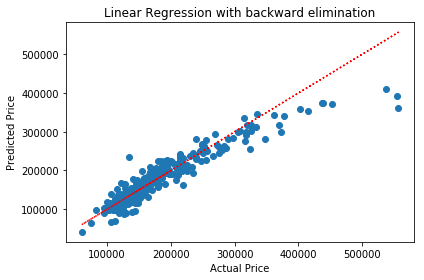

In [39]:
lm = LinearRegression()
Xs = df[selected[1:]] # get rid of constant
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=0)
lm.fit(Xs_train, y_train)
y_pred = lm.predict(Xs_test)
linear_r2 = r2_score(y_test, y_pred)
print("Linear model after Backward elimination R2: {}".format(linear_r2))
plt.figure(3)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, ':r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression with backward elimination')
plt.tight_layout()
plt.savefig('lr_be.tif')

Decision Tree R2: 0.8023829315724265
[0.72640283 0.75016626 0.72476349 0.68311451 0.70579355]
mean: 0.7180481286725442 | stddev: 0.022436594112952474


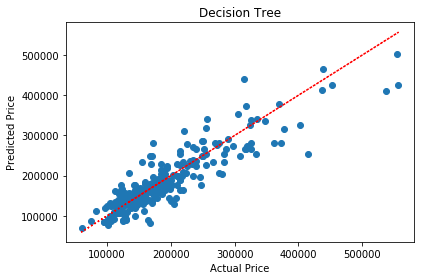

In [40]:
### your solution
# (1) fit the initial model on the training set
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
dt_r2 = r2_score(y_test, y_pred)
scores = cross_validate(tree_model, X, y, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print("Decision Tree R2: {}".format(dt_r2))
score = scores['test_r2']
print(score) # large variance, overfitting
print("mean: {} | stddev: {}".format(score.mean(), score.std()))
plt.figure(4)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, ':r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree')
plt.tight_layout()
plt.savefig('dt.tif')

In [41]:
grid_para_tree = {'max_depth': range(2,10), 
    'min_samples_split': range(2,6),
    'max_features': ('auto', 'sqrt', 'log2'),
    }

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(tree_model, grid_para_tree, scoring='r2', cv=5)
gs.fit(X_train, y_train)

/Users/lawliet/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 10), 'min_samples_split': range(2, 6), 'max_features': ('auto', 'sqrt', 'log2')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [42]:
gs.best_params_

{'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 2}

Decision Tree after Grid Search R2: 0.7302735360193381
[0.70159683 0.76149594 0.74287367 0.67590316 0.70324918]
mean: 0.7170237536179938 | stddev: 0.030869485933165602


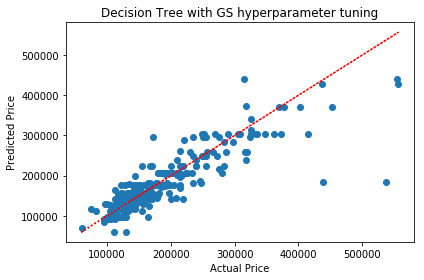

In [43]:
tree_model = DecisionTreeRegressor(**gs.best_params_)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
dt_r2 = r2_score(y_test, y_pred)
scores = cross_validate(tree_model, X, y, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print("Decision Tree after Grid Search R2: {}".format(dt_r2))
score = scores['test_r2']
print(score) # reduced variance and imporved R2 score
print("mean: {} | stddev: {}".format(score.mean(), score.std()))
plt.figure(5)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, ':r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree with GS hyperparameter tuning')
plt.tight_layout()
plt.savefig('dt_gs.tif')